[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff878da1c50>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff871709410>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff87170f990>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff8716d9a90>, <tensorflow.python.keras.layers.core.Flatten object at 0x7ff8716f7ed0>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff8716ee250>, <tensorflow.python.keras.layers.core.Dropout object at 0x7ff8716ee890>, <tensorflow.python.keras.layers.core.Dense object at 0x7ff8716d9d50>]
(3, 3, 1, 32) (32,)
0.020251136 0.1270816


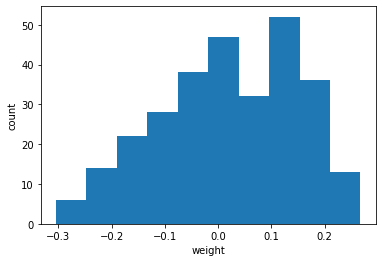

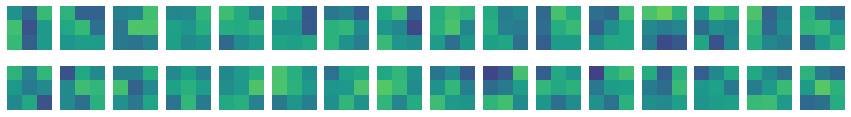

(3, 3, 1, 32)
0.0060145515 0.08192934


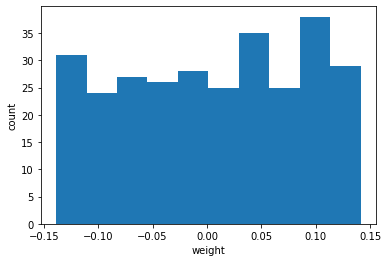

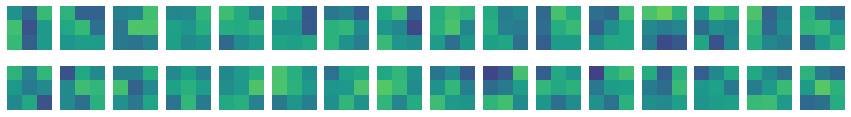

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


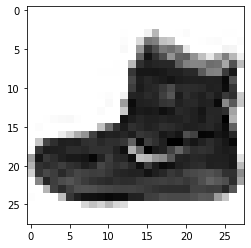

(1, 28, 28, 32)


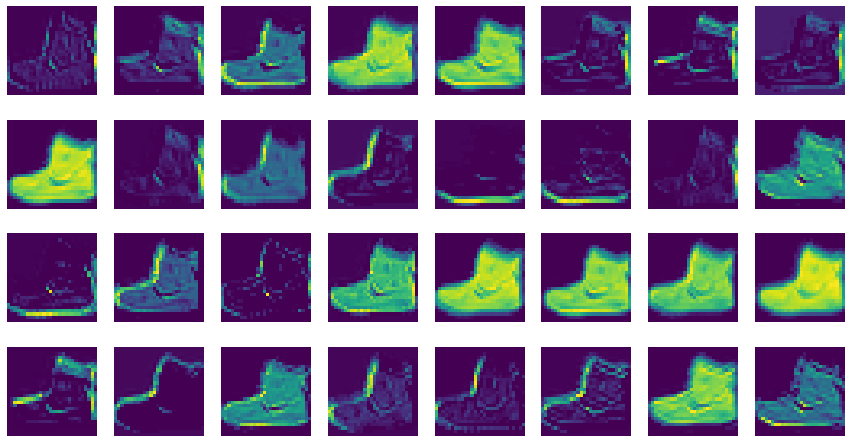

(1, 14, 14, 64)


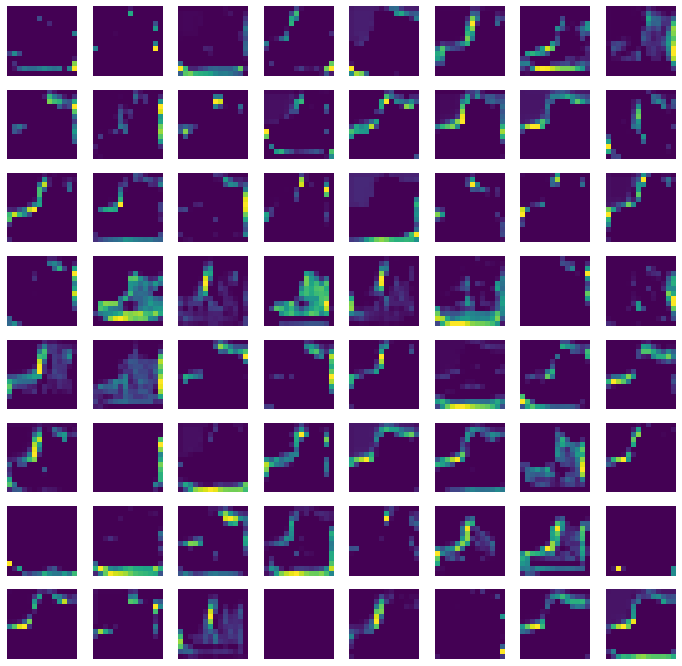

In [20]:
#가중치 시각화
# 모델을 생성할 때 function() api 사용

#가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

print(model.layers)

conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2,16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')

plt.show()

no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

no_train_weights = no_training_conv.weights[0].numpy()

print(no_train_weights.mean(), no_train_weights.std())

plt.hist(no_train_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2,16, figsize=(15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')

plt.show()

#함수형 API
# dense1 = keras.layers.Dense(100, activation='sigmoid')
# dense2 = keras.layers.Dense(10, activation='softmax')

#hidden = dense1(inputs) : InputLayer 객체를 생성해야함.
#outputs = dense2(hidden)
#model = keras.Model(inputs, outputs)

#inputs = keras.Input(shape=....)
#hidden = dense1(inputs)
#outputs = dense2(hidden)
#model = keras.Model(inputs, outputs)

#모델 객체의 층
#model객체 - InputLayer -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Flatten -> Dense -> Dropout -> Dense

print(model.input)

conv_acti = keras.models.Model(model.input, model.layers[0].output)

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

fig, axs = plt.subplots(4,8, figsize=(15,8))

for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')

plt.show()


conv2_acti = keras.models.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv2_acti.predict(inputs)

print(feature_maps.shape)

fig, axs = plt.subplots(8,8, figsize=(12,12))

for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')

plt.show()